In [69]:
import datetime as dt
print(dt.datetime.now())

2020-05-16 22:58:15.915001


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [71]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                                 "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                                 "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                                 "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                                 "ies/time_series_covid19_recovered_global.csv")
df_death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/" +
                             "master/csse_covid_19_data/csse_covid_19_time_series/time_s" +
                             "eries_covid19_deaths_global.csv")

In [72]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48


In [73]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,458,468,472,502,558,558,610,648,691,745
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,595,605,620,627,650,654,682,688,694,705
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,521,526,537,545,550,550,568,576,596,604
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,13,13,13,13,14,14,17


In [74]:
df_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,104,106,109,115,120,122,127,132,136,153
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,476,483,488,494,502,507,515,522,529,536
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,46,47,47,48,48,48,48,49,49,49
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [75]:
start_date = '1/22/20'
# Needed because of daily updates on database which cannot be updated yet
# where the date of "today" has not been updated.
# So, for practicity, we get one day before. We could get the last column as well.
end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')

In [76]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [77]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Iran,0,0,0,0,0,0,0,0,0,0,...,101650,103135,104691,106220,107603,109286,110767,112725,114533,116635
Turkey,0,0,0,0,0,0,0,0,0,0,...,131744,133721,135569,137115,138657,139771,141475,143114,144749,146457
Germany,0,0,0,0,0,1,4,4,4,5,...,168162,169430,170588,171324,171879,172576,173171,174098,174478,175233
France,0,0,2,3,3,3,4,5,5,5,...,174224,174918,176202,176782,177094,177547,178349,178184,178994,179630
Brazil,0,0,0,0,0,0,0,0,0,0,...,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291
Italy,0,0,0,0,0,0,0,0,0,2,...,214457,215858,217185,218268,219070,219814,221216,222104,223096,223885
Spain,0,0,0,0,0,0,0,0,0,0,...,220325,221447,222857,223578,224350,227436,228030,228691,229540,230183
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,202359,207977,212629,216525,220449,224332,227741,230985,234440,238004
Russia,0,0,0,0,0,0,0,0,0,2,...,165929,177160,187859,198676,209688,221344,232243,242271,252245,262843


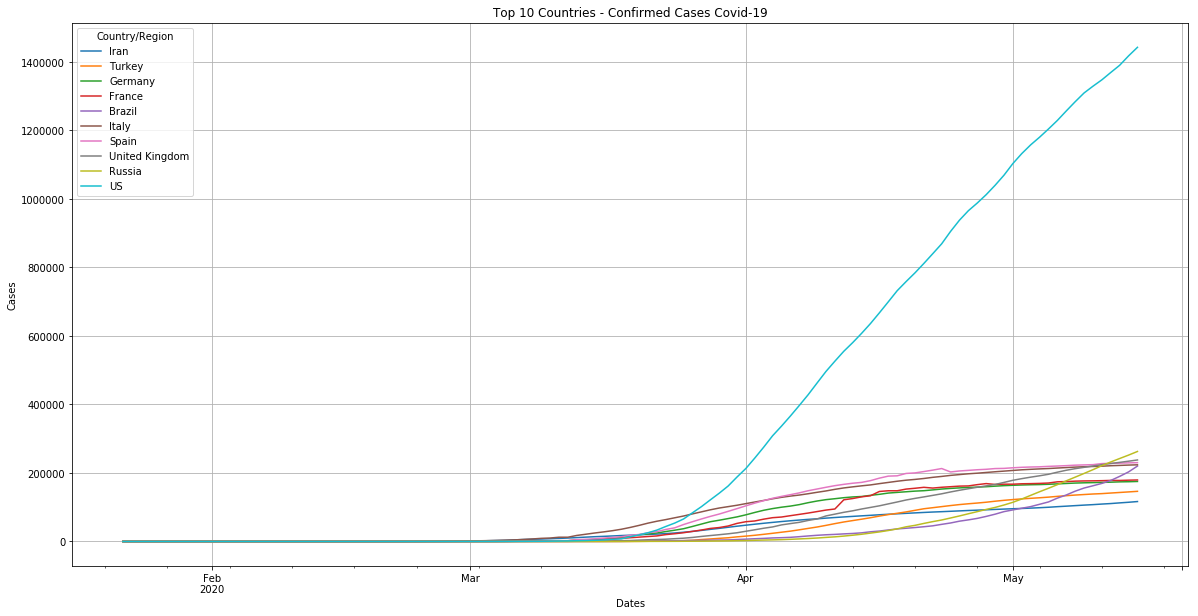

In [78]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data from recovered cases of Top 10 Countries with confirmed cases.

In [79]:
top10_countries = df_top10.columns.tolist() # Name of contries inside top 10
# Searching recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [80]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,934,970,997,1001,1002,1015,1023,1032,1043,1047
Russia,0,0,0,0,0,0,0,0,0,0,...,21327,23803,26608,31916,34306,39801,43512,48003,53530,58226
France,0,0,0,0,0,0,0,0,0,0,...,54079,55191,55892,56148,56327,56835,57898,58786,59719,60562
Brazil,0,0,0,0,0,0,0,0,0,0,...,51370,55350,59297,61685,64957,67384,72597,78424,79479,84970
Iran,0,0,0,0,0,0,0,0,0,0,...,81587,82744,83837,85064,86143,87422,88357,89428,90539,91836
Turkey,0,0,0,0,0,0,0,0,0,0,...,78202,82984,86396,89480,92691,95780,98889,101715,104030,106133
Italy,0,0,0,0,0,0,0,0,0,0,...,93245,96276,99023,103031,105186,106587,109039,112541,115288,120205
Spain,0,0,0,0,0,0,0,0,0,0,...,126002,128511,131148,133952,136166,137139,138980,140823,143374,144783
Germany,0,0,0,0,0,0,0,0,0,0,...,139900,141700,141700,143300,144400,145617,147200,148700,150300,151597


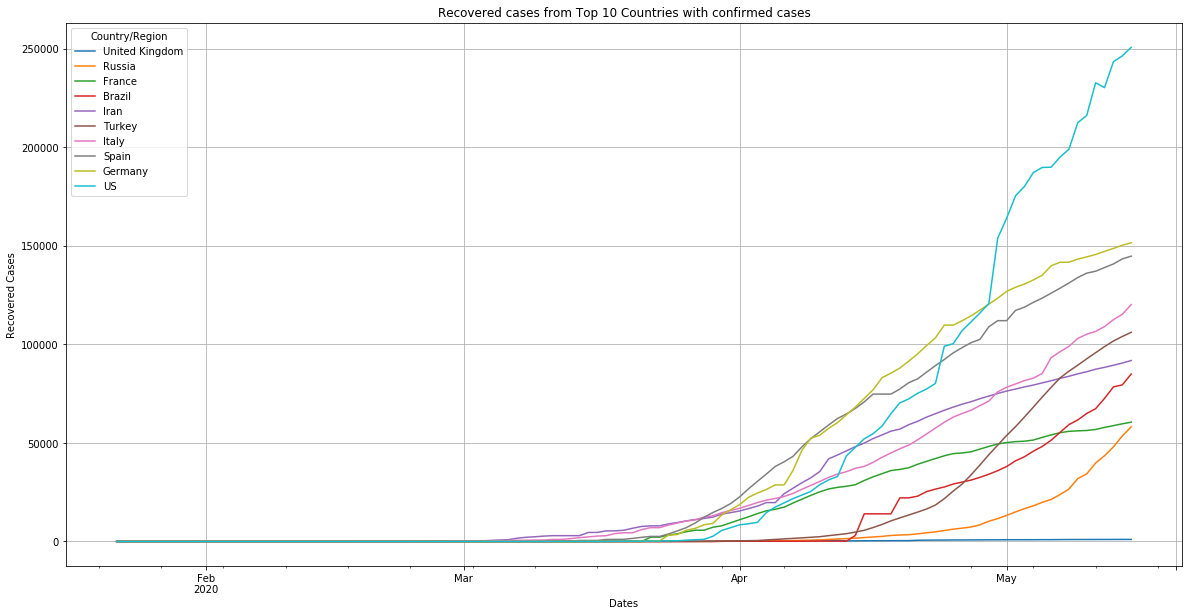

In [81]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');

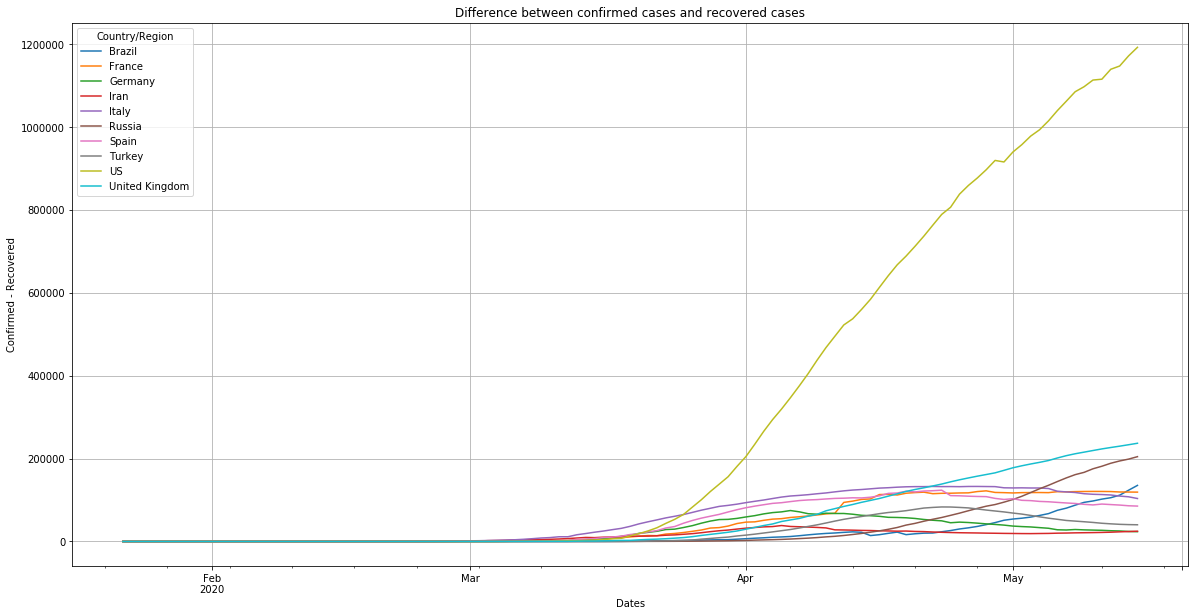

In [82]:
fig = plt.figure(figsize = (20, 10))
ax_3 = fig.add_subplot(1,1,1)
df_diff = df_top10 - df_recovered
df_diff.plot(ax=ax_3, legend=True)
ax_3.set_title("Difference between confirmed cases and recovered cases", fontsize=12)
ax_3.grid(True)
ax_3.set(xlabel='Dates', ylabel='Confirmed - Recovered');

In [83]:
df_death = df_death_cases.loc[df_death_cases['Country/Region'].isin(top10_countries)]
df_death = df_death.groupby(['Country/Region']).sum()
df_death = df_death.loc[:, start_date:end_date]
df_death = df_death.sort_values(by=[end_date]).tail(10)

In [84]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,0,0,0,0,0,0,0,0,0,0,...,1537,1625,1723,1827,1915,2009,2116,2212,2305,2418
Turkey,0,0,0,0,0,0,0,0,0,0,...,3584,3641,3689,3739,3786,3841,3894,3952,4007,4055
Iran,0,0,0,0,0,0,0,0,0,0,...,6418,6486,6541,6589,6640,6685,6733,6783,6854,6902
Germany,0,0,0,0,0,0,0,0,0,0,...,7275,7392,7510,7549,7569,7661,7738,7861,7884,7897
Brazil,0,0,0,0,0,0,0,0,0,0,...,8588,9190,10017,10656,11123,11653,12461,13240,13999,14962
Spain,0,0,0,0,0,0,0,0,0,0,...,25857,26070,26299,26478,26621,26744,26920,27104,27321,27459
France,0,0,0,0,0,0,0,0,0,0,...,25812,25990,26233,26313,26383,26646,26994,27077,27428,27532
Italy,0,0,0,0,0,0,0,0,0,0,...,29684,29958,30201,30395,30560,30739,30911,31106,31368,31610
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,30150,30689,31316,31662,31930,32141,32769,33264,33693,34078


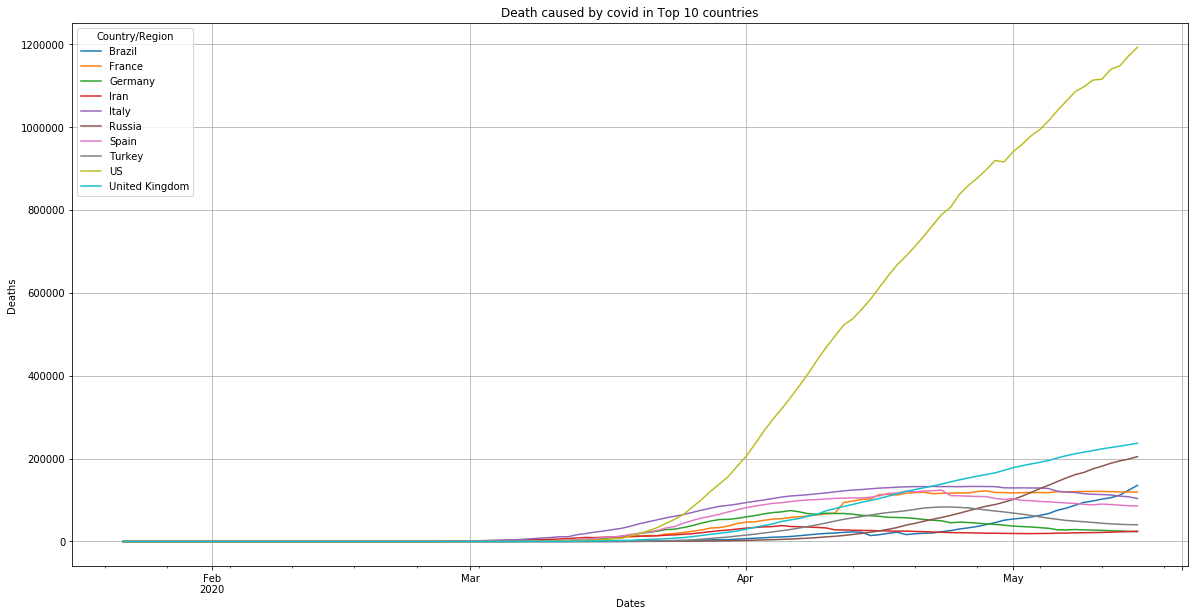

In [85]:
fig = plt.figure(figsize = (20, 10))
ax_4 = fig.add_subplot(1,1,1)
df_diff.plot(ax=ax_4, legend=True)
ax_4.set_title("Death caused by covid in Top 10 countries", fontsize=12)
ax_4.grid(True)
ax_4.set(xlabel='Dates', ylabel='Deaths');

Active cases (Confirmed Cases - (Recovered + Deaths))

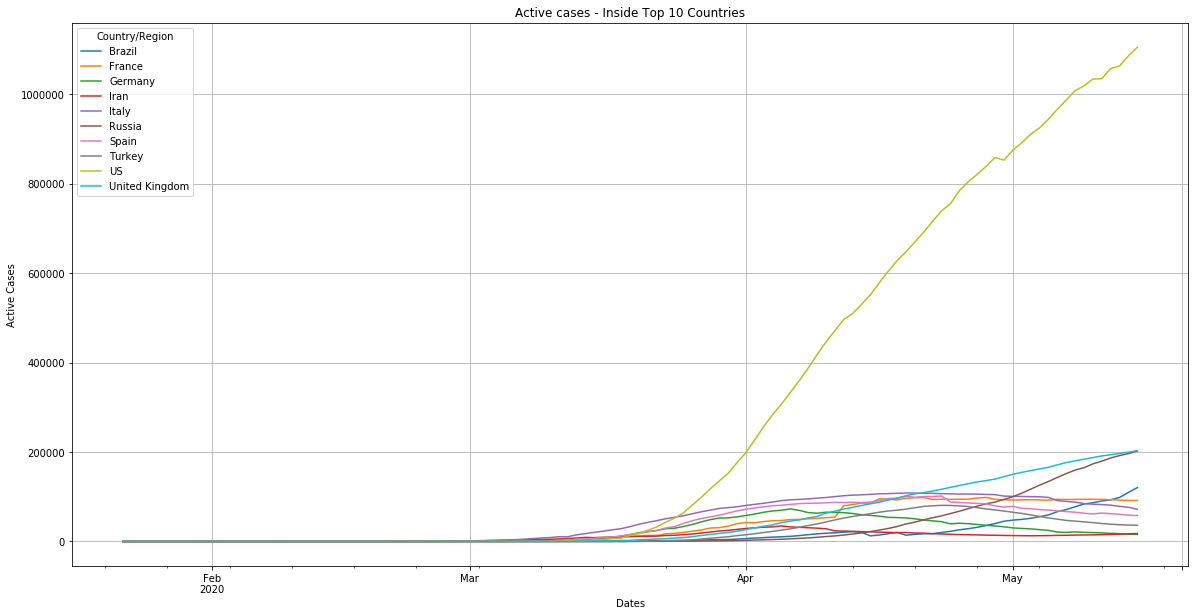

In [94]:
fig = plt.figure(figsize = (20, 10))
ax_5 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_active = (df_top10 - (df_recovered + df_death))
df_active.plot(ax=ax_5, legend=True)
ax_5.set_title("Active cases - Inside Top 10 Countries", fontsize=12)
ax_5.grid(True)
ax_5.set(xlabel='Dates', ylabel='Active Cases');